In this lesson, we'll see how we can take the matplotlib skills we've picked up in this course and apply them to the web using some of the hottest new visualization libraries out today. In the next few examples, we'll see how to turn our matplotlib plots into web-ready, interactive graphics using the [Bokeh][1], [Plot.ly][2], and [mpld3][3] libraries. Let's go ahead and get started and see some of these libraries in action.

[1]: http://bokeh.pydata.org/
[2]: https://plot.ly/
[3]: http://mpld3.github.io/

The setup for this lesson is a bit sparse compared to some of the earlier lessons. We'll just be importing the `pyplot` module and the NumPy library this time around, since each of the libraries we will be using have their own unique setup that we'll need to do in order to use them.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Ok, common imports out of the way, let's take a look at our first library, bokeh.

## Bokeh

Bokeh is a visualization library for building interactive graphics for modern web browsers with an emphasis on providing high-performance over very large datasets. The library was created by Continuum, the company responsible for the Anaconda distribution of python that we're using in this course, as well as many more interesting data-oriented products. 

Now, the bokeh library wasn't designed with matplotlib in mind, but as you'll see time-and-time again, one of the benefits that matplotlib enjoys, being the de facto standard visualization library for python, is that pretty much every other visualization library provides at least some rudimentary support for it. And, if you take a look at [bokeh's FAQ page][1], you'll see the following quote:

> Bokeh also intends to fully support the MPL interface (and hence Seaborn, pandas, and ggplot.py)...

[1]: http://bokeh.pydata.org/en/0.10.0/docs/faq.html#how-does-bokeh-compare-to-mpld3



In [ ]:
from bokeh import mpl
from bokeh.plotting import output_notebook, show
output_notebook()

In [ ]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
y = np.sin(x / 2)
z = np.cos(x / 4)

plt.title("Matplotlib Figure in Bokeh")
plt.plot(x, y, "r-", marker='o')
plt.plot(x, z, "g-x", linestyle="-.")

show(mpl.to_bokeh());

## Plot.ly

In [ ]:
import plotly

# Turn off matplotlib interactive mode
plt.ioff()

# Turn on offline mode (so we do everything locally, i.e. without a Plotly account)
plotly.offline.init_notebook_mode() # run at the start of every notebook

In [ ]:
n = 50
x, y, z, s, ew = np.random.rand(5, n)
c, ec = np.random.rand(2, n, 4)
area_scale, width_scale = 500, 5

fig, ax = plt.subplots()
sc = ax.scatter(x, y, c=c,
                s=np.square(s)*area_scale,
                edgecolor=ec,
                linewidth=ew*width_scale)
ax.grid()

Most of the examples in the official Plotly documentation use either the `plot_mpl` function, or the Jupyter notebook equivalent `iplot_mpl`, to render their plots. Both of these functions, however, will make a call to the Plotly service to do the actual rendering, so you'll need an account to use either of them. If you want convert your matplotlib plots locally, however, you can do so using the `plotly.tools.mpl_to_plotly` function. 

Both of the `*plot_mpl` functions call the `mpl_to_plotly` function to do the actual conversion of the matplotlib figure to a JSON object that can then be used to make the Plotly visualization. The `mpl_to_plotly` function returns this JSON structure, and we save it below for rendering in the next cell.

In [ ]:
pfig = plotly.tools.mpl_to_plotly(fig)

Now, if we had used the `iplot_mpl` functions in the last cell, it would have called the `mpl_to_plotly` function, just as we did, but once it got back the JSON object, it would have sent it to the Plotly service, received a unique URL for the plot, and opened the URL within the Jupyter notebook. We can, however, render our plot without actually making a call to the Plotly service, and we do that using the `plotly.offline.iplot` function. 

In the code below, we call this function and pass it the JSON object that we captured from the call to `mpl_to_plotly` in our last cell. This will create a beautful SVG plot that comes with a decent amount of interactivity for free.

In [ ]:
plotly.offline.iplot(pfig)

## mpld3



In [2]:
%matplotlib inline

plt.ioff()

import mpld3

In [3]:
plt.plot(np.array([3,1,4,1,5]), 'ks-', mec='w', mew=5, ms=20);

In [6]:
mpld3.display(plt.gcf())

In [7]:
mpld3.enable_notebook()

In [11]:
plt.plot(np.array([3,1,4,1,5]), 'ks-', mec='w', mew=5, ms=20);

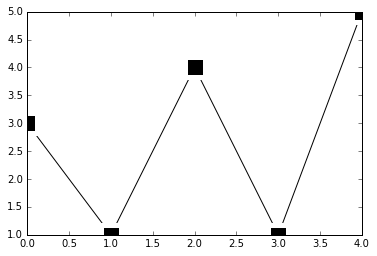

In [12]:
plt.show()